安田さんのPlumeコード

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpt
import pandas as pd

df = np.genfromtxt('europa_plume_plasma_map')
l_2d = len(df)

In [42]:
print(l_2d)

384000


In [3]:
print(df.shape)

(384000, 4)


In [43]:
idx = np.array(np.where(df[:,0]>-1000))
print(idx[0,0])
r_size = idx[0,0]
c_size = int(l_2d/r_size)

In [82]:
x = df[:,0].reshape(c_size, r_size)
print(x.shape)
y = df[:,1].reshape(c_size, r_size)
print(y.shape)
z = df[:,2].reshape(c_size, r_size)
print(z.shape)
v = df[:,3].reshape(c_size, r_size).T

(800, 480)
(800, 480)
(800, 480)


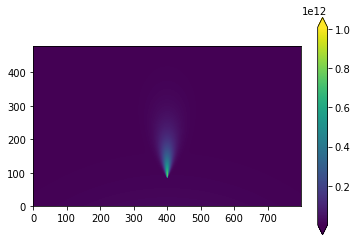

In [93]:
plt.imshow(v, origin='lower', interpolation='nearest')
plt.colorbar(extend='both')
plt.show();

In [187]:
idx_list = np.array([])
i_list = np.zeros([v.shape[1]])
for i in range(v.shape[1]):
    v0 = v[:,i]
    v0_idx = np.array(np.where(v0>3.1E+11))
    idx_list = np.append(idx_list, v0_idx[0])

In [185]:
v0 = v[:,400]
v0_idx = np.min(np.where(v0>3.1E+11))
print(v0_idx)

80


In [195]:
vv = v > 3.1E+11
vv = vv.astype(np.uint8)
print(vv)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


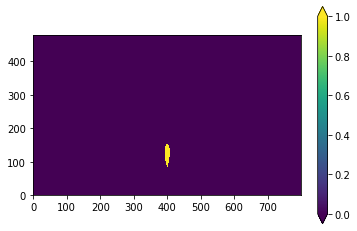

In [196]:
plt.imshow(vv, origin='lower', interpolation='nearest')
plt.colorbar(extend='both')
plt.show();

In [220]:
print(np.max(vv))

1


In [243]:
up = np.roll(vv, 1, axis=0)
down = np.roll(vv, -1, axis=0)
right = np.roll(vv, 1, axis=1)
left = np.roll(vv, -1, axis=1)

vvv = up + down + right+ left - 4*vv
vvv = vvv.astype(np.uint8)

In [244]:
print(np.max(vvv))

255


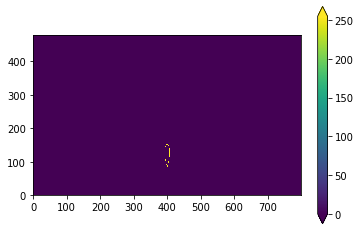

In [245]:
plt.imshow(vvv, origin='lower', interpolation='nearest')
plt.colorbar(extend='both')
plt.show();

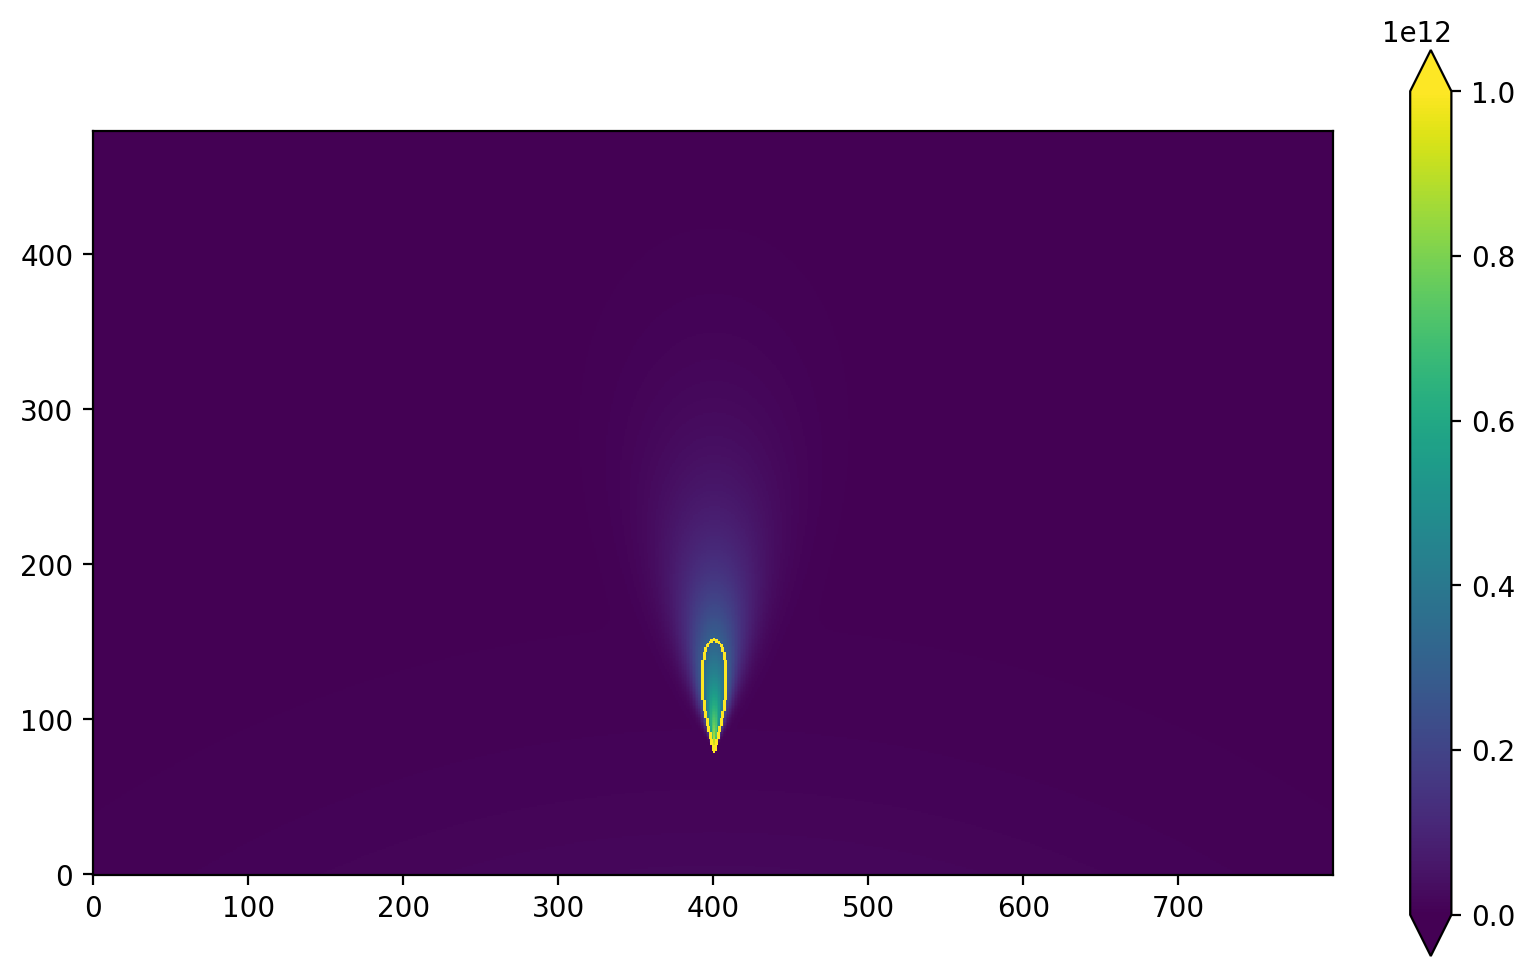

In [246]:
plt.figure(dpi=200, figsize=(10,6))
plt.imshow(v+vvv*1E+12, origin='lower', interpolation='nearest', vmin=0, vmax=1E+12)
plt.colorbar(extend='both')
plt.show();